# Import Package 

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import pandas as pd
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
import glob as gb

# Discover Datasit 

In [25]:
data_dir = open( 'D:\\selectedProject\\Football_dataset.csv')
x = pd.read_csv(data_dir)

In [26]:
x.head()

index        folder_name        filename
0      0  cristiano_ronaldo  002d1969db.jpg
1      1  cristiano_ronaldo  00f4f88ab0.jpg
2      2  cristiano_ronaldo  02fef0c068.jpg
3      3  cristiano_ronaldo  036e267689.jpg
4      4  cristiano_ronaldo  03eacf0178.jpg

In [27]:
x.tail()

index         folder_name        filename
1929   1929  zlatan_ibrahimovic  fbb5763678.jpg
1930   1930  zlatan_ibrahimovic  fde3265e2f.jpg
1931   1931  zlatan_ibrahimovic  fe7fddc7e4.jpg
1932   1932  zlatan_ibrahimovic  febf3d67c5.jpg
1933   1933  zlatan_ibrahimovic  fef1b86098.jpg

In [28]:
print(x.shape)

(1934, 3)


In [110]:
import splitfolders as spf

In [113]:
iput_folder = 'D:\\selectedProject\\football_golden_foot\\football_golden_foot'
spf.ratio(iput_folder, output= "D:\\selectedProject\\football_golden_foot\\new_data",seed=42,ratio=(.8,0,.2),group_prefix=None)

Copying files: 1934 files [00:02, 832.29 files/s]


In [3]:
filesPath = 'D:\\selectedProject\\football_golden_foot\\new_data\\'

In [4]:
# numper of exampel in each folder (train)

filesPath = 'D:\\selectedProject\\football_golden_foot\\new_data\\'
for folder in os.listdir(filesPath+'train'):
    files = gb.glob(pathname = str(filesPath+'train\\' + folder +'\*.jpg'))
    print(f'For data, found {len(files)} in folder {folder}')

For data, found 276 in folder cristiano_ronaldo
For data, found 265 in folder lionel_messi
For data, found 278 in folder mohamed_salah
For data, found 192 in folder pele
For data, found 256 in folder ronaldinho
For data, found 276 in folder zlatan_ibrahimovic


In [5]:
# Knowning size of all image (train)

size = []
for folder in os.listdir(filesPath+'train\\'):
    files = gb.glob(pathname = str(filesPath+'train\\' + folder +'\*.jpg'))
    for file in files: 
        image =plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(168, 300, 3)      194
(183, 275, 3)      127
(225, 225, 3)       75
(194, 259, 3)       55
(168, 299, 3)       40
                  ... 
(2160, 3840, 3)      1
(1274, 1600, 3)      1
(250, 250, 3)        1
(671, 1024, 3)       1
(626, 940, 3)        1
Length: 505, dtype: int64

In [6]:
# numper of exampel in each folder (test)

for folder in os.listdir(filesPath+'test'):
    files = gb.glob(pathname = str(filesPath+'test\\' + folder +'\*.jpg'))
    print(f'For data, found {len(files)} in folder {folder}')

For data, found 70 in folder cristiano_ronaldo
For data, found 67 in folder lionel_messi
For data, found 70 in folder mohamed_salah
For data, found 49 in folder pele
For data, found 65 in folder ronaldinho
For data, found 70 in folder zlatan_ibrahimovic


In [5]:
# Knowning size of all image (test)

size = []
for folder in os.listdir(filesPath+'test'):
    files = gb.glob(pathname = str(filesPath+'test\\' + folder +'\*.jpg'))
    for file in files: 
        image =plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(168, 300, 3)      58
(183, 275, 3)      40
(675, 1200, 3)     10
(168, 299, 3)      10
(1200, 1200, 3)    10
                   ..
(354, 630, 3)       1
(1400, 1400, 3)     1
(801, 1200, 3)      1
(632, 960, 3)       1
(351, 624, 3)       1
Length: 201, dtype: int64

In [7]:
IMAGE_SIZE = 150

In [8]:
CATEGORIES = {"cristiano_ronaldo":0, "lionel_messi":1, "mohamed_salah":2, "pele":3, "ronaldinho":4, "zlatan_ibrahimovic":5}
def getCat(n):
    for x, y in CATEGORIES.items():
        if n == y:
            return x

In [9]:
x_train = []
y_train = []
for folder in os.listdir(filesPath+'train'):
    files = gb.glob(pathname = str(filesPath+'train\\' + folder +'\*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image, (IMAGE_SIZE,IMAGE_SIZE))
        x_train.append(list(image_array))
        y_train.append(CATEGORIES[folder])

In [10]:
x_test = []
y_test = []
for folder in os.listdir(filesPath+'test'):
    files = gb.glob(pathname = str(filesPath+'test\\' + folder +'\*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image, (IMAGE_SIZE,IMAGE_SIZE))
        x_test.append(list(image_array))
        y_test.append(CATEGORIES[folder])

In [11]:
# print(image_array)
print(image_array.shape)

(150, 150, 3)


In [12]:
print(len(x_train) ,"items in x_train")
print(len(x_test) ,"items in x_test")

1543 items in x_train
391 items in x_test


# Some Visualization

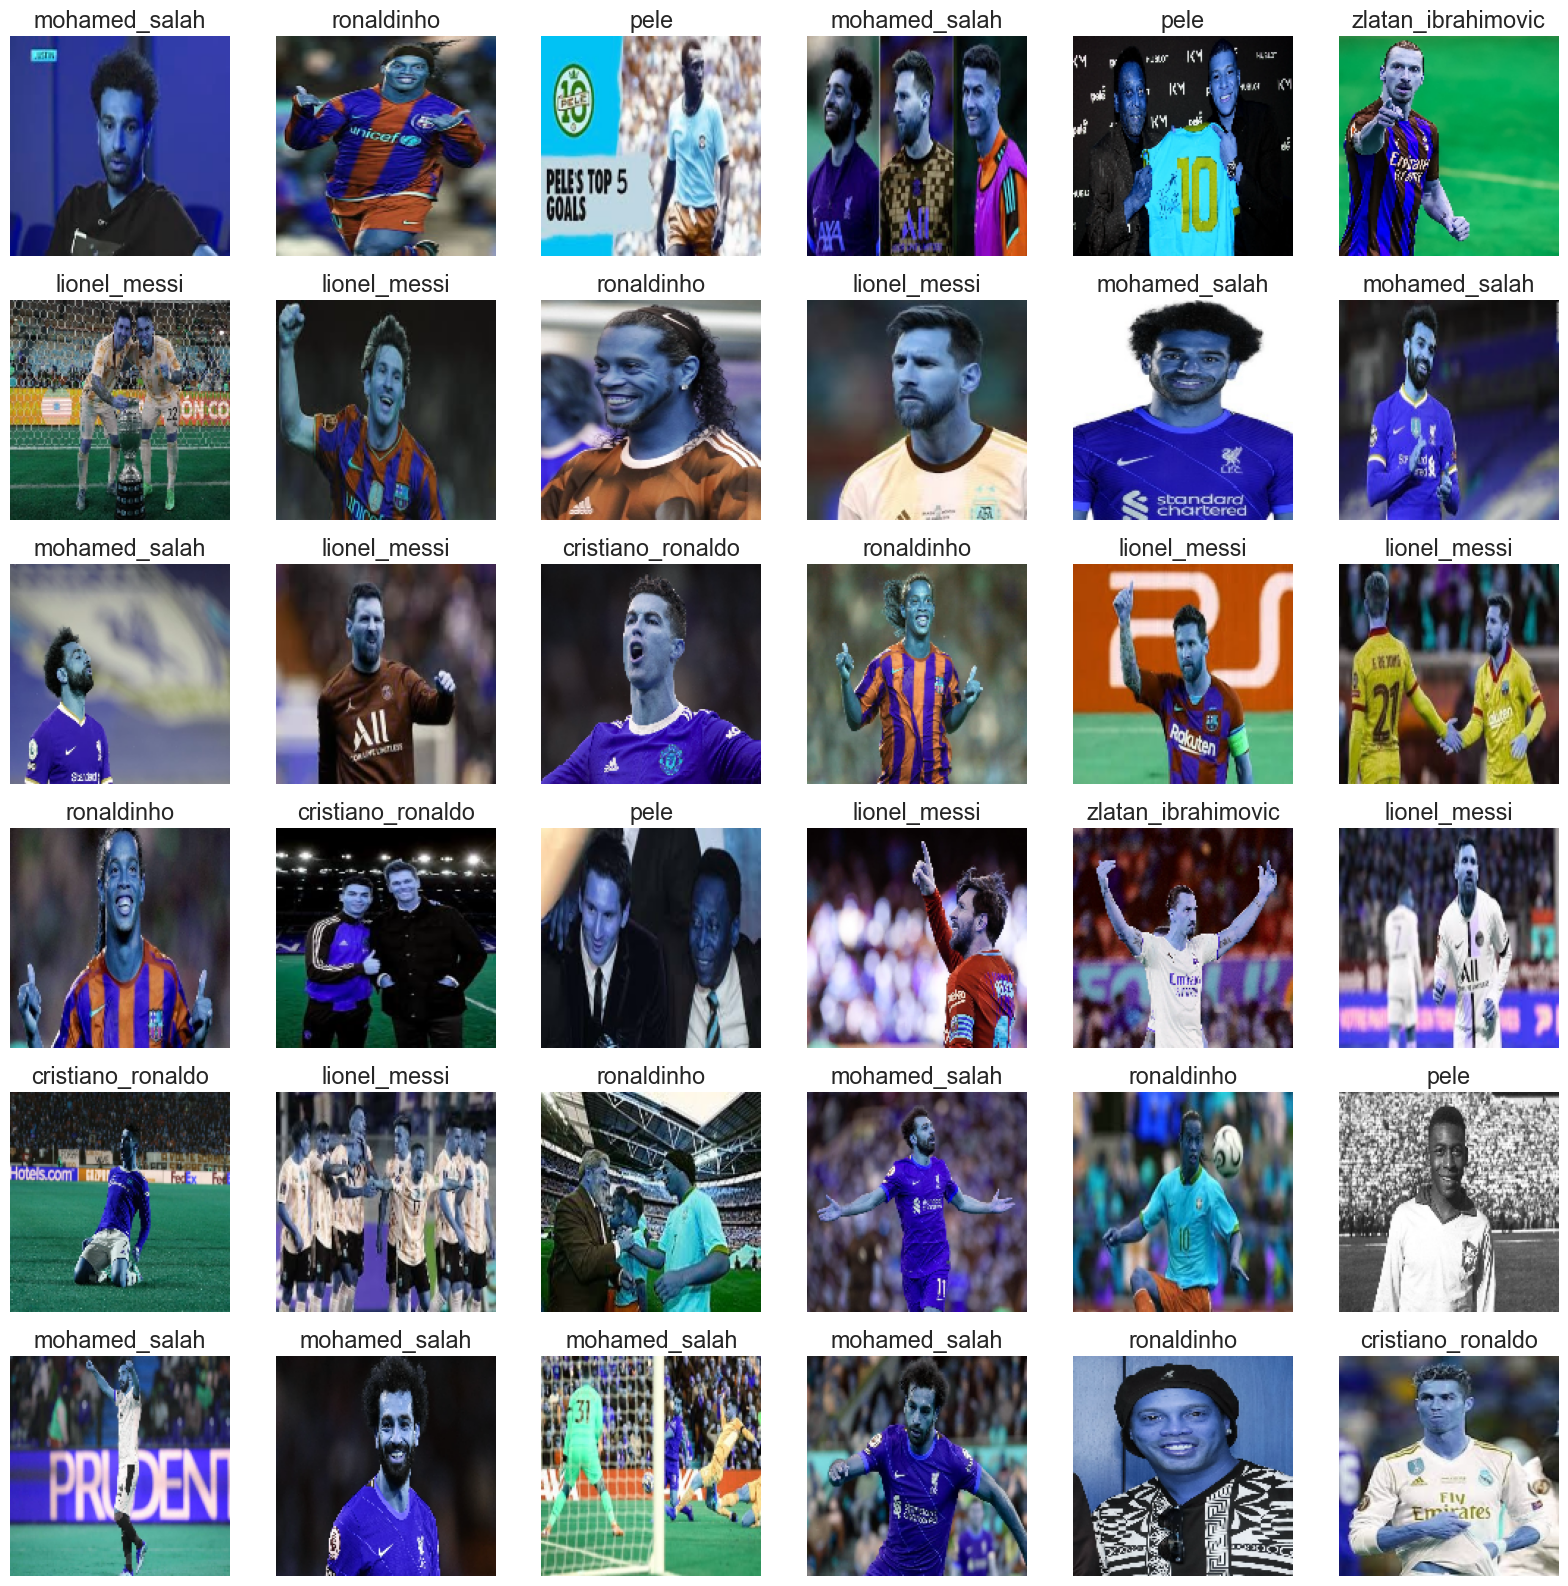

In [13]:
plt.figure(figsize=(20,20))
for n,i in enumerate (list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title(getCat(y_train[i]))

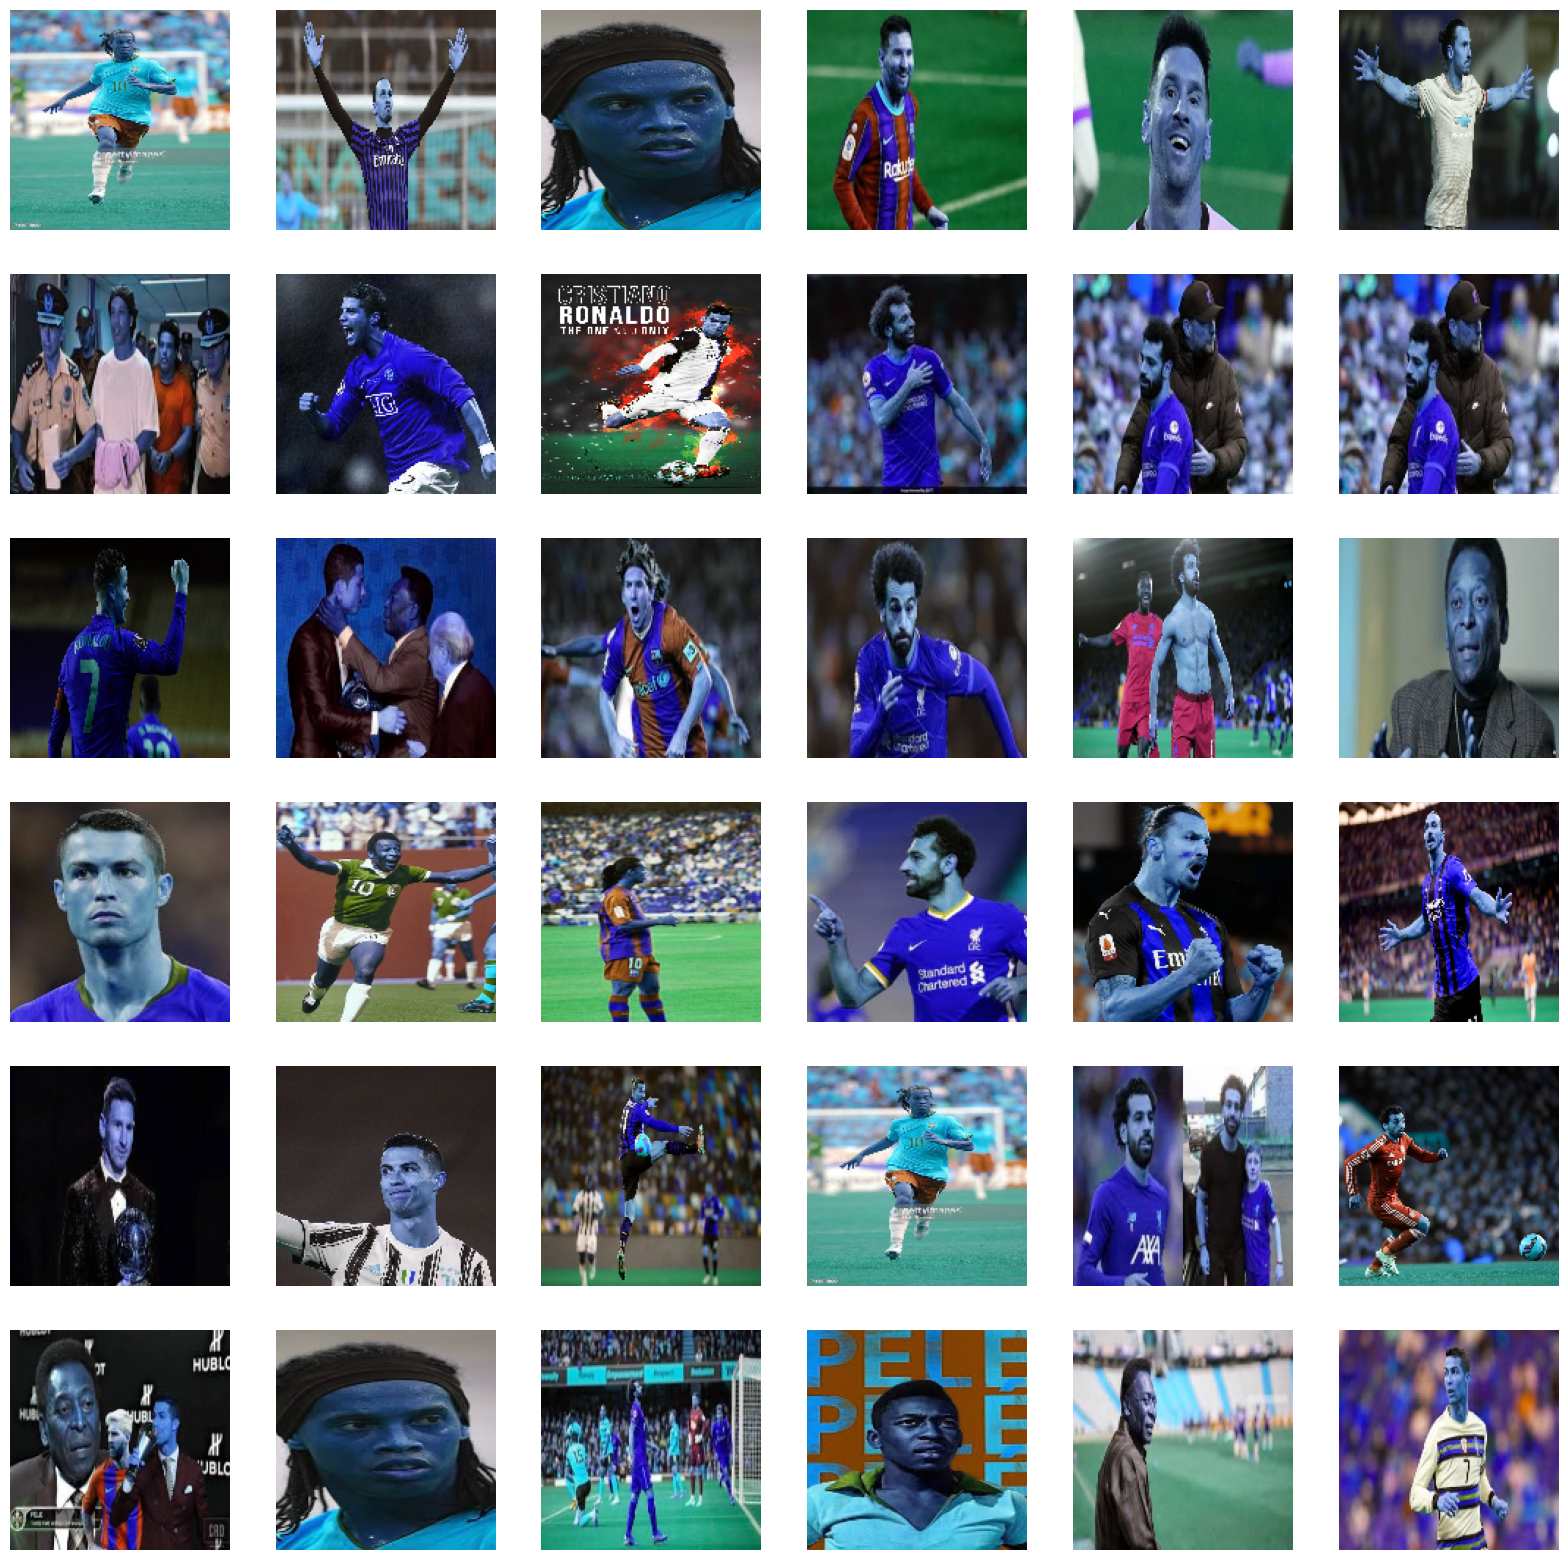

In [14]:
plt.figure(figsize=(20,20))
for n,i in enumerate (list(np.random.randint(0,len(x_test),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])
    plt.axis("off")


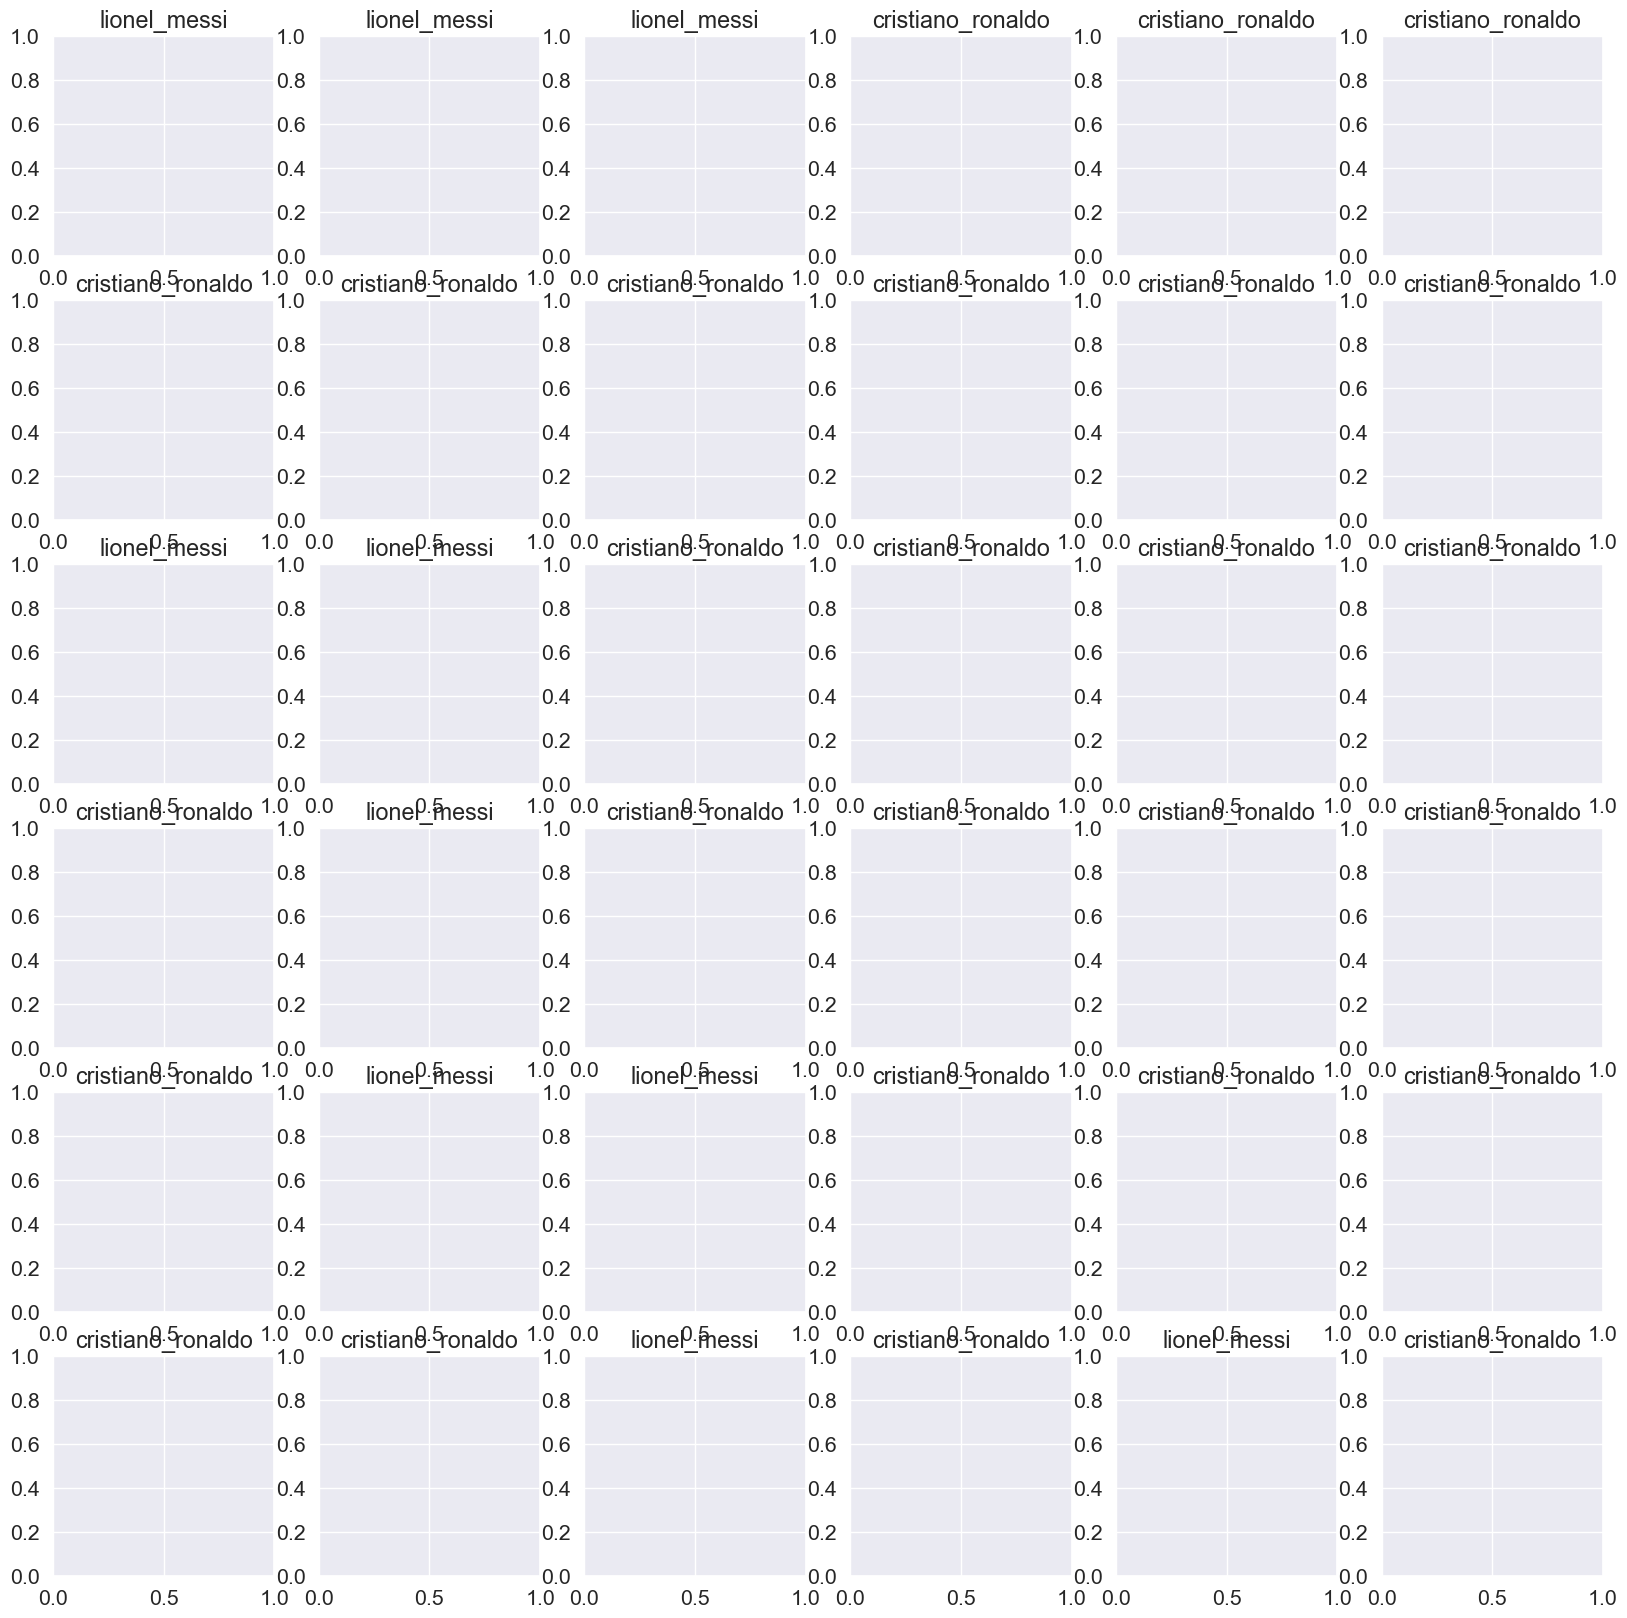

In [15]:
plt.figure(figsize=(20,20))
for n,i in enumerate (list(np.random.randint(0,len(x_test),36))):
    plt.subplot(6,6,n+1)
    plt.title(getCat(y_train [i]))

In [16]:
# print(np.array(x_train).shape)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1543, 150, 150, 3)
(391, 150, 150, 3)
(1543,)
(391,)


# Implement Model

In [42]:
# create model of CNN before optimization
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [43]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [45]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split = 0.2)

Epoch 1/20
20/20 [==============================] - 16s 776ms/step - loss: 174.0303 - accuracy: 0.2577 - val_loss: 5.4737 - val_accuracy: 0.0259
Epoch 2/20
20/20 [==============================] - 16s 791ms/step - loss: 1.0838 - accuracy: 0.6345 - val_loss: 8.8915 - val_accuracy: 0.0518
Epoch 3/20
20/20 [==============================] - 17s 867ms/step - loss: 0.2415 - accuracy: 0.9295 - val_loss: 11.3139 - val_accuracy: 0.0744
Epoch 4/20
20/20 [==============================] - 18s 912ms/step - loss: 0.0516 - accuracy: 0.9895 - val_loss: 16.8975 - val_accuracy: 0.0550
Epoch 5/20
20/20 [==============================] - 17s 844ms/step - loss: 0.0136 - accuracy: 0.9984 - val_loss: 17.2285 - val_accuracy: 0.0744
Epoch 6/20
20/20 [==============================] - 17s 832ms/step - loss: 0.0123 - accuracy: 0.9984 - val_loss: 19.9649 - val_accuracy: 0.0777
Epoch 7/20
20/20 [==============================] - 16s 818ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 20.7049 - val_accuracy:

In [48]:
test_loss = model.evaluate(x_test, y_test)

13/13 [==============================] - 1s 79ms/step - loss: 7.5239 - accuracy: 0.6266


In [20]:
# create model of CNN after optimization

model = tf.keras.Sequential([
    keras.layers.Conv2D(200, (3, 3), activation = 'relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)),
    keras.layers.Conv2D(150, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(4,4),
    keras.layers.Conv2D(120, (3, 3), activation = 'relu'),
    keras.layers.Conv2D(80, (3, 3), activation = 'relu'),
    keras.layers.Conv2D(50, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(6, activation='softmax'),
])

In [21]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
print('Model Details are: ')
print(model.summary())

Model Details are: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 200)     5600      
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 150)     270150    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 150)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 120)       162120    
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 80)        86480     
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 50)        36050     
                                  

## Train Model

In [23]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
25/25 [==============================] - 439s 17s/step - loss: 3.9663 - accuracy: 0.1776
Epoch 2/20
25/25 [==============================] - 415s 17s/step - loss: 1.7388 - accuracy: 0.2249
Epoch 3/20
25/25 [==============================] - 414s 17s/step - loss: 1.5878 - accuracy: 0.2981
Epoch 4/20
25/25 [==============================] - 414s 17s/step - loss: 1.6003 - accuracy: 0.2858
Epoch 5/20
25/25 [==============================] - 417s 17s/step - loss: 1.4515 - accuracy: 0.4135
Epoch 6/20
25/25 [==============================] - 416s 17s/step - loss: 1.2994 - accuracy: 0.4634
Epoch 7/20
25/25 [==============================] - 411s 16s/step - loss: 1.1736 - accuracy: 0.5554
Epoch 8/20
25/25 [==============================] - 443s 18s/step - loss: 1.0487 - accuracy: 0.6066
Epoch 9/20
25/25 [==============================] - 433s 17s/step - loss: 0.9200 - accuracy: 0.6559
Epoch 10/20
25/25 [==============================] - 416s 16s/step - loss: 0.6479 - accuracy: 0.7699

## Test Model

In [25]:
test_loss = model.evaluate(x_test, y_test)

13/13 [==============================] - 30s 2s/step - loss: 1.3554 - accuracy: 0.8056


In [ ]:
model.save("wh.model")